<a href="https://colab.research.google.com/github/guilhermelaviola/MovieRatingAnalysis/blob/main/IMDbWatchlistStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-1-88ff570e2e2d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


# **Basic information of the dataset**

In [2]:
# Importing the dataset and displying the first 10 rows:
df = pd.read_excel('WATCHLIST.xlsx')
df.head(10)

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,2020-04-29,Vertigo,movie,8.3,128,1958,"Mystery, Romance, Thriller",427044,1958-05-09 00:00:00,Alfred Hitchcock
1,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin
2,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",386979,2007-12-03 00:00:00,Tim Burton
3,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro
4,2020-05-11,Alaska,movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston
5,2020-05-11,Far from Home: The Adventures of Yellow Dog,movie,6.3,81,1995,"Adventure, Family",3282,1995-01-13 00:00:00,Phillip Borsos
6,2020-05-14,Lady in the Water,movie,5.5,110,2006,"Drama, Fantasy, Mystery, Thriller",103799,2006-07-17 00:00:00,M. Night Shyamalan
7,2020-05-15,The Rescuers Down Under,movie,6.8,77,1990,"Animation, Adventure, Comedy, Family, Fantasy",47279,1990-11-16 00:00:00,"Mike Gabriel, Hendel Butoy"
8,2020-05-15,The Rescuers,movie,6.9,77,1977,"Animation, Adventure, Comedy, Family, Fantasy",69926,1977-06-19 00:00:00,"Art Stevens, Wolfgang Reitherman, John Lounsbery"
9,2020-05-15,Bicentennial Man,movie,6.9,132,1999,"Drama, Romance, Sci-Fi",124718,1999-12-13 00:00:00,Chris Columbus


In [3]:
# Displaying the number of rows and columns in the dataset:
df.shape

(768, 10)

In [5]:
# Displaying the datatypes of each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Created         768 non-null    datetime64[ns]
 1   Title           768 non-null    object        
 2   Title Type      768 non-null    object        
 3   IMDb Rating     768 non-null    float64       
 4   Runtime (mins)  768 non-null    int64         
 5   Year            768 non-null    int64         
 6   Genres          768 non-null    object        
 7   Num Votes       768 non-null    int64         
 8   Release Date    768 non-null    object        
 9   Directors       764 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 60.1+ KB


In [6]:
# Displaying statistical data of the numerical data present in the dataset:
df.describe()

,Created,IMDb Rating,Runtime (mins),Year,Num Votes
count,768,768.000000,768.000000,768.000000,7.680000e+02
mean,2022-07-20 23:48:45.000000256,6.656901,114.055990,1990.246094,8.313088e+04
min,2020-04-29 00:00:00,0.000000,71.000000,1927.000000,0.000000e+00
25%,2021-10-28 12:00:00,6.200000,100.000000,1982.000000,5.641000e+03
50%,2022-05-23 12:00:00,6.700000,109.500000,1992.000000,2.334350e+04
75%,2023-02-21 06:00:00,7.200000,121.000000,2000.000000,7.714975e+04
max,2024-06-04 00:00:00,9.000000,317.000000,2024.000000,2.871665e+06
std,NaN,0.810559,24.754982,16.234610,1.982657e+05


# **Basic column data plotting**

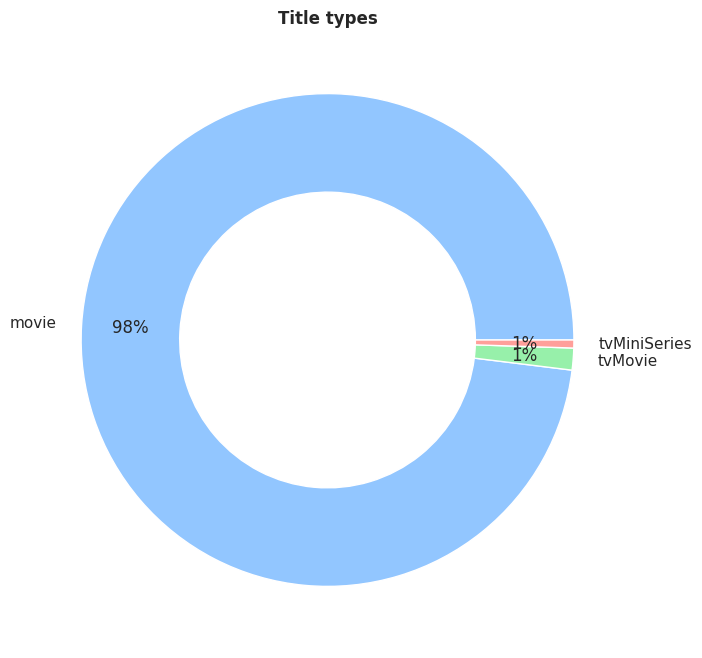

In [7]:
# Displaying the title types present in the dataset:
df['Title Type'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

In [8]:
# Creating a datetime object based on the dates from the dataset:
df['Created'] = df['Created'].map(pd.to_datetime)
df['Day Created'] = df['Created'].apply(lambda x : x.day)
df['Month Created'] = df['Created'].apply(lambda x : x.month)
df['Year Created'] = df['Created'].apply(lambda x : x.year)
df['Weekday Created'] = df['Created'].apply(lambda x : x.weekday())

# Displaying the datatypes of each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Created          768 non-null    datetime64[ns]
 1   Title            768 non-null    object        
 2   Title Type       768 non-null    object        
 3   IMDb Rating      768 non-null    float64       
 4   Runtime (mins)   768 non-null    int64         
 5   Year             768 non-null    int64         
 6   Genres           768 non-null    object        
 7   Num Votes        768 non-null    int64         
 8   Release Date     768 non-null    object        
 9   Directors        764 non-null    object        
 10  Day Created      768 non-null    int64         
 11  Month Created    768 non-null    int64         
 12  Year Created     768 non-null    int64         
 13  Weekday Created  768 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7)

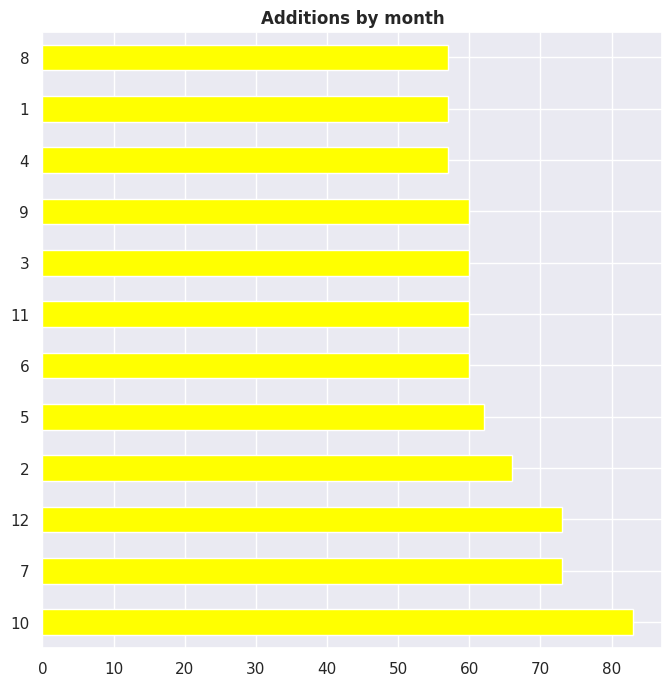

In [10]:
# Displaying the months with most and less additions:
df['Month Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Additions by month', fontweight = 'bold')
plt.show()

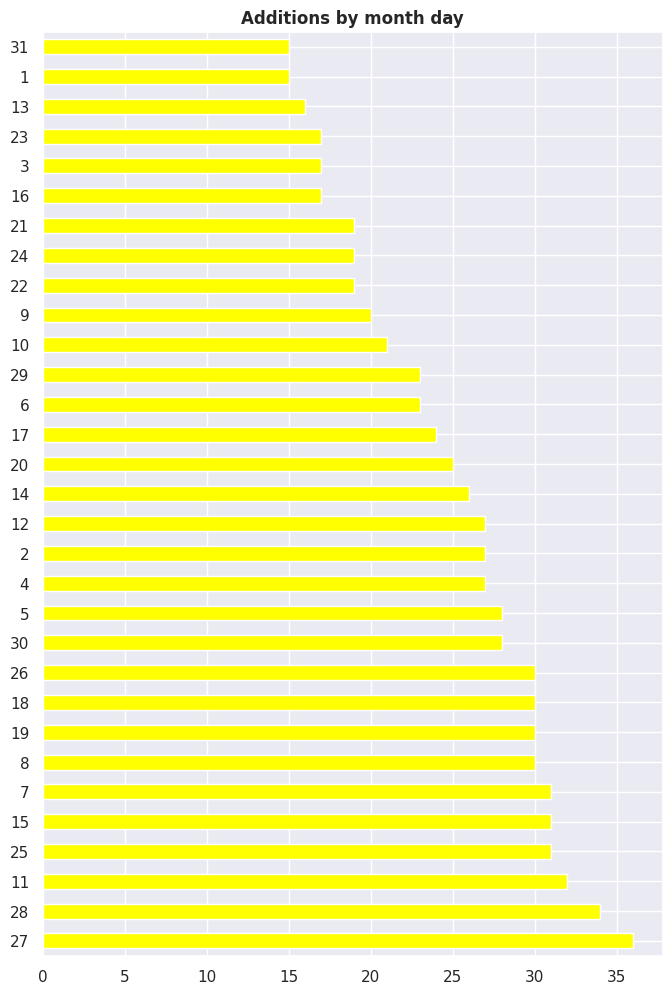

In [11]:
# Displaying the month days with most and less additions:
df['Day Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 12))
plt.ylabel(None)
plt.title('Additions by month day', fontweight = 'bold')
plt.show()

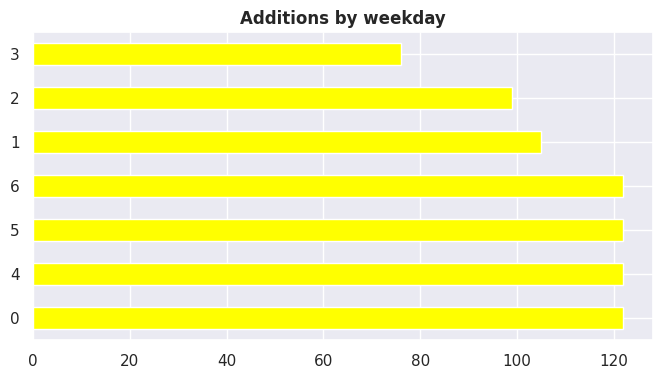

In [12]:
# Displaying the weekdays with most and less additions:
df['Weekday Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by weekday', fontweight = 'bold')
plt.show()

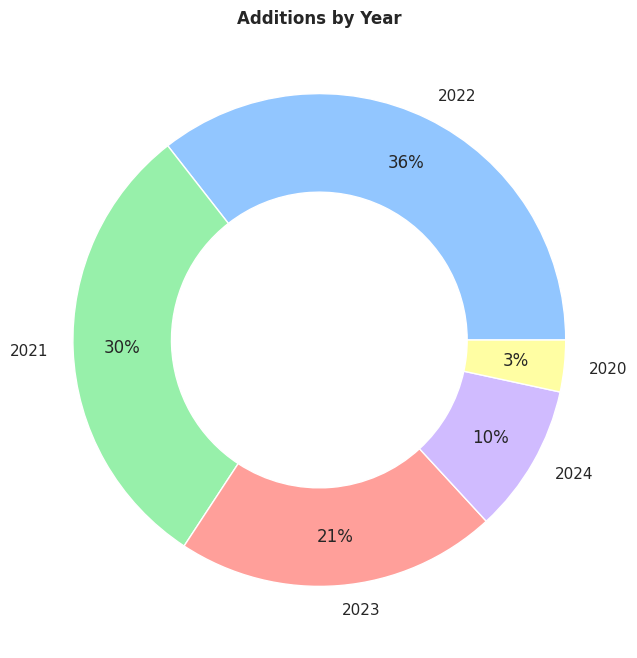

In [13]:
# Displaying the years with most and less additions:
df['Year Created'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Additions by Year', fontweight = 'bold')
plt.show()

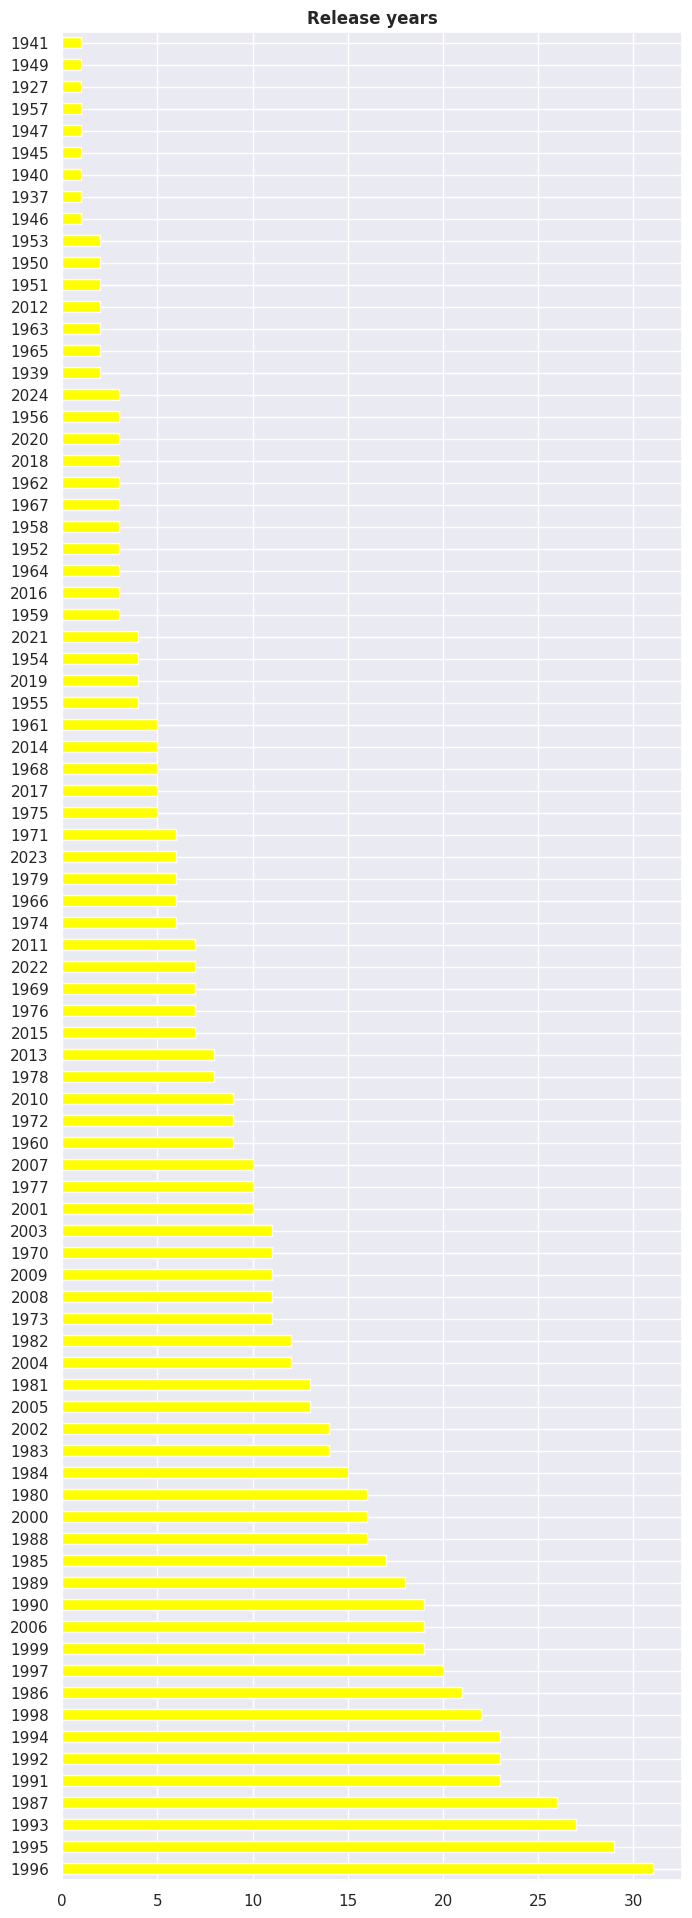

In [15]:
# Displaying distibution of release years in the dataset:
df['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 24))
plt.ylabel(None)
plt.title('Release years', fontweight = 'bold')
plt.show()

# **Applying functions to combine data from more than one column to generate new columns with analytics**

In [16]:
# Classifying the movies by decade they were release in:
def movies_by_decade(year):
  if year >= 1900 and year < 1910:
    result = '1900s'
  elif year >= 1910 and year < 1920:
    result = '1910s'
  elif year >= 1920 and year < 1930:
    result = '1920s'
  elif year >= 1930 and year < 1940:
    result = '1930s'
  elif year >= 1940 and year < 1950:
    result = '1940s'
  elif year >= 1950 and year < 1960:
    result = '1950s'
  elif year >= 1960 and year < 1970:
    result = '1960s'
  elif year >= 1970 and year < 1980:
    result = '1970s'
  elif year >= 1980 and year < 1990:
    result = '1980s'
  elif year >= 1990 and year < 2000:
    result = '1990s'
  elif year >= 2000 and year < 2010:
    result = '2000s'
  elif year >= 2010 and year < 2020:
    result = '2010s'
  elif year >= 2020 and year < 2030:
    result = '2020s'
  else:
    result = 'Unknown'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
df['Decade'] = df['Year'].apply(movies_by_decade)
df.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade
0,2020-04-29,Vertigo,movie,8.3,128,1958,"Mystery, Romance, Thriller",427044,1958-05-09 00:00:00,Alfred Hitchcock,29,4,2020,2,1950s
1,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,29,4,2020,2,1940s
2,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",386979,2007-12-03 00:00:00,Tim Burton,7,5,2020,3,2000s
3,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s
4,2020-05-11,Alaska,movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,11,5,2020,0,1990s


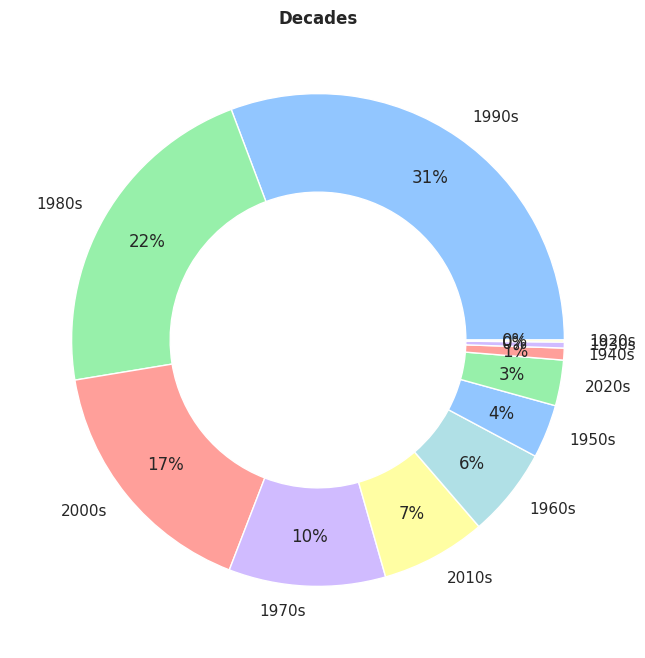

In [18]:
# Displaying the decades the movies are from:
df['Decade'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Decades', fontweight = 'bold')
plt.show()

In [19]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Regular'
  elif rating >= 4 and rating < 5:
    quality = 'Bad'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
df['Quality'] = df['IMDb Rating'].apply(imdb_rating)
df.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality
0,2020-04-29,Vertigo,movie,8.3,128,1958,"Mystery, Romance, Thriller",427044,1958-05-09 00:00:00,Alfred Hitchcock,29,4,2020,2,1950s,Amazing
1,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,29,4,2020,2,1940s,Amazing
2,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",386979,2007-12-03 00:00:00,Tim Burton,7,5,2020,3,2000s,Good
3,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s,Regular
4,2020-05-11,Alaska,movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,11,5,2020,0,1990s,Regular


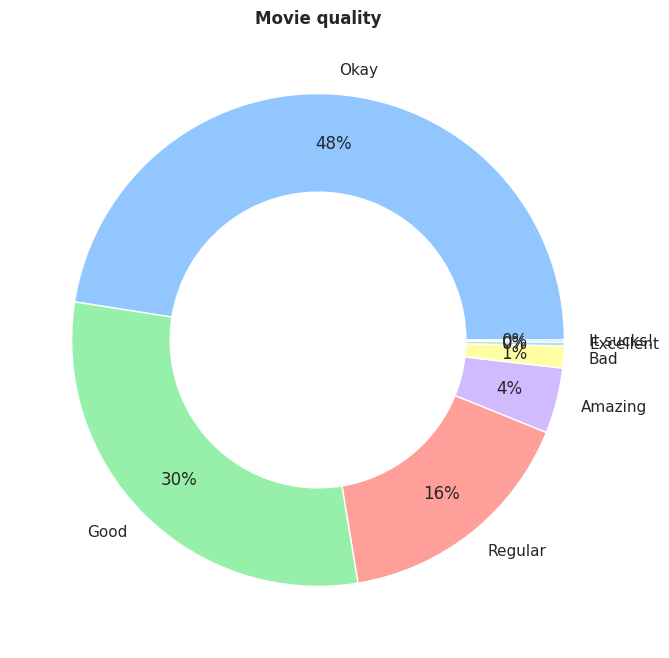

In [20]:
# Displaying the movie rating classification based on the algorithm above:
df['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [21]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes >= 2000000:
    popularity = 'Over 2M votes'
  elif num_votes >= 1000000 and num_votes < 2000000:
    popularity = 'Over 1M votes'
  elif num_votes >= 500000 and num_votes < 1000000:
    popularity = 'Over 500k votes'
  elif num_votes >= 250000 and num_votes < 500000:
    popularity = 'Over 250k votes'
  else:
    popularity = 'Less than 250k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
df['Movie popularity'] = df['Num Votes'].apply(movie_popularity)
df.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity
0,2020-04-29,Vertigo,movie,8.3,128,1958,"Mystery, Romance, Thriller",427044,1958-05-09 00:00:00,Alfred Hitchcock,29,4,2020,2,1950s,Amazing,Over 250k votes
1,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,29,4,2020,2,1940s,Amazing,Less than 250k votes
2,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",386979,2007-12-03 00:00:00,Tim Burton,7,5,2020,3,2000s,Good,Over 250k votes
3,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s,Regular,Less than 250k votes
4,2020-05-11,Alaska,movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,11,5,2020,0,1990s,Regular,Less than 250k votes


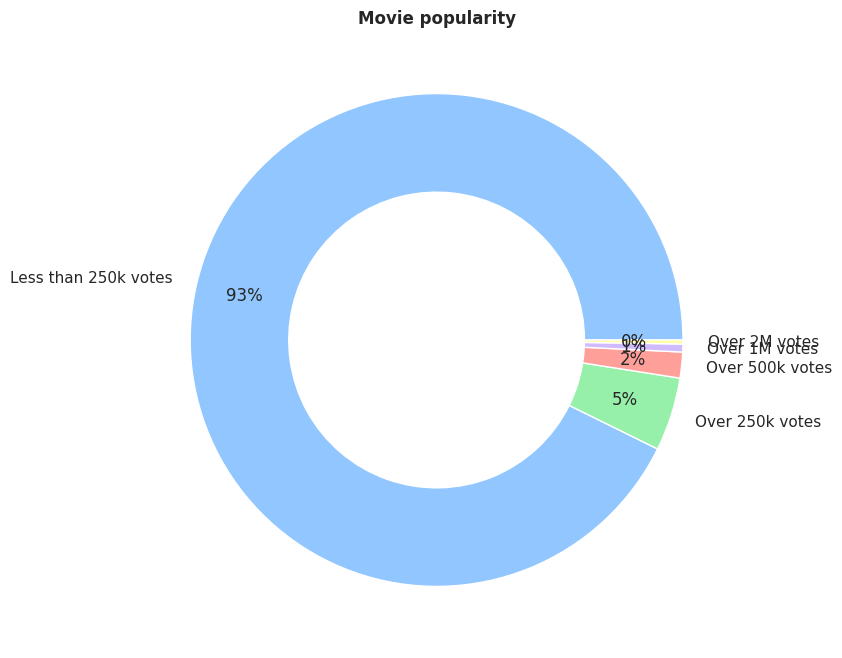

In [22]:
# Displaying the movie popularity based on the algorithm above:
df['Movie popularity'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [23]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
df['Movie duration'] = df['Runtime (mins)'].apply(movie_duration)
df.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration
0,2020-04-29,Vertigo,movie,8.3,128,1958,"Mystery, Romance, Thriller",427044,1958-05-09 00:00:00,Alfred Hitchcock,29,4,2020,2,1950s,Amazing,Over 250k votes,Between 2h and 2h29
1,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,29,4,2020,2,1940s,Amazing,Less than 250k votes,Between 2h and 2h29
2,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",386979,2007-12-03 00:00:00,Tim Burton,7,5,2020,3,2000s,Good,Over 250k votes,Between 1h40 and 1h59
3,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h30 and 1h39
4,2020-05-11,Alaska,movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h40 and 1h59


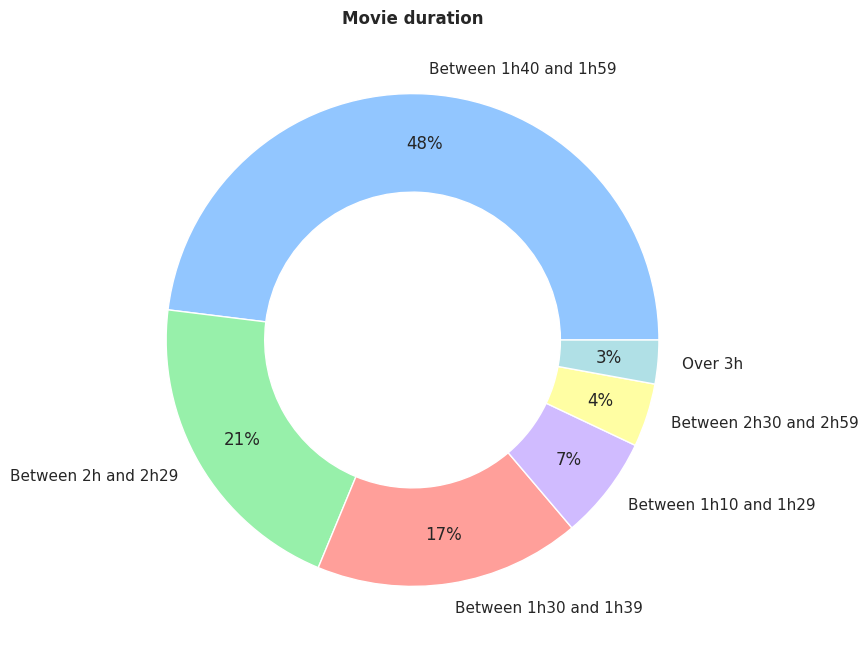

In [24]:
# Displaying the movie duration based on the algorithm above:
df['Movie duration'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [25]:
# Classifying the movies by year quartile added based on the month they were added to the dataset:
def year_quartile(month):
  if month >= 1 and month <= 3:
    quartile = 'First'
  elif month >= 4 and month <= 6:
    quartile = 'Second'
  elif month >= 7 and month <= 9:
    quartile = 'Third'
  else:
    quartile = 'Fourth'
  return quartile

# Applying the function above on a column of the dataset and generating a new column as result:
df['Quartile Added'] = df['Month Created'].apply(year_quartile)
df.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added
0,2020-04-29,Vertigo,movie,8.3,128,1958,"Mystery, Romance, Thriller",427044,1958-05-09 00:00:00,Alfred Hitchcock,29,4,2020,2,1950s,Amazing,Over 250k votes,Between 2h and 2h29,Second
1,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,29,4,2020,2,1940s,Amazing,Less than 250k votes,Between 2h and 2h29,Second
2,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",386979,2007-12-03 00:00:00,Tim Burton,7,5,2020,3,2000s,Good,Over 250k votes,Between 1h40 and 1h59,Second
3,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h30 and 1h39,Second
4,2020-05-11,Alaska,movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h40 and 1h59,Second


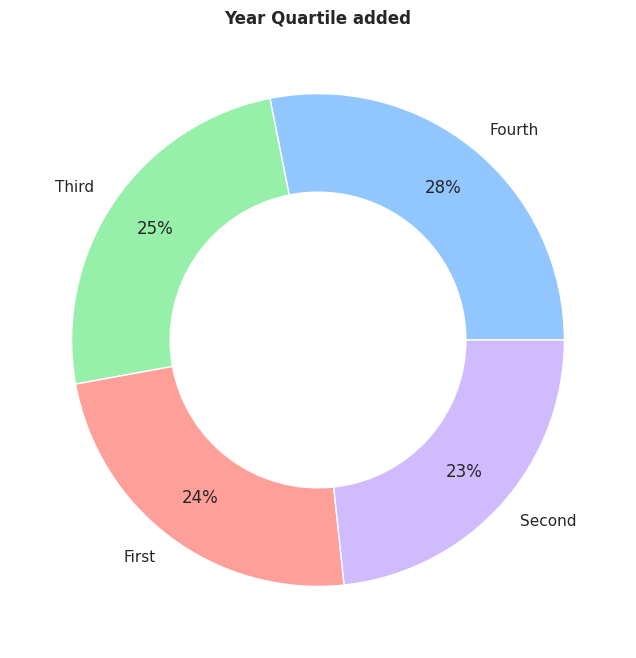

In [26]:
# Displaying the quartile the movie was added based on the algorithm above:
df['Quartile Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year Quartile added', fontweight = 'bold')
plt.show()

In [27]:
# Classifying the movies by the month half added based on the day they were added to the dataset:
def month_half(day):
  if day >= 1 and day <= 15:
    half = 'First'
  else:
    half = 'Second'
  return half

# Applying the function above on a column of the dataset and generating a new column as result:
df['Month Half Added'] = df['Day Created'].apply(month_half)
df.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added,Month Half Added
0,2020-04-29,Vertigo,movie,8.3,128,1958,"Mystery, Romance, Thriller",427044,1958-05-09 00:00:00,Alfred Hitchcock,29,4,2020,2,1950s,Amazing,Over 250k votes,Between 2h and 2h29,Second,Second
1,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,29,4,2020,2,1940s,Amazing,Less than 250k votes,Between 2h and 2h29,Second,Second
2,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",386979,2007-12-03 00:00:00,Tim Burton,7,5,2020,3,2000s,Good,Over 250k votes,Between 1h40 and 1h59,Second,First
3,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h30 and 1h39,Second,First
4,2020-05-11,Alaska,movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h40 and 1h59,Second,First


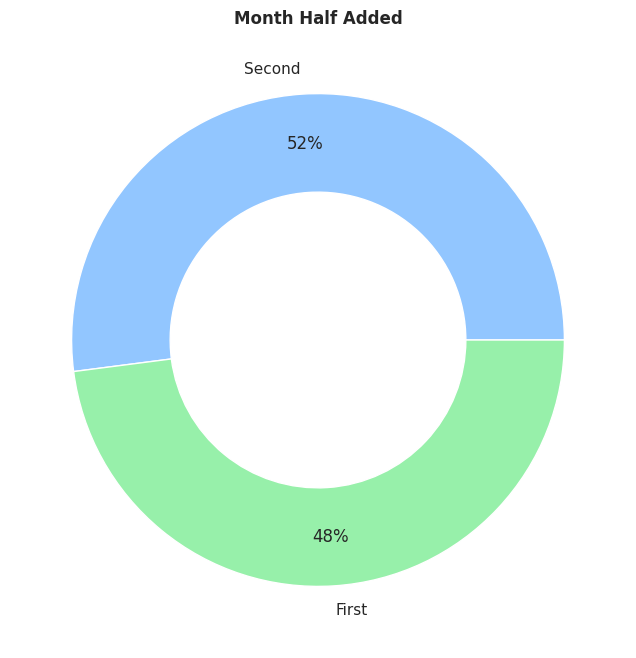

In [29]:
# Displaying the month half the movie was added based on the algorithm above:
df['Month Half Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Month Half Added', fontweight = 'bold')
plt.show()

# **The algorithm velow was a bit more complicated to be implemented, as the movie genres are listed in the column separated by comma, so they had to be splitted and counted, and then their proportions were counted and plotted.**

In [30]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

# Splitting the genres by comma and removing leading spaces:
df['Genres'] = df['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
df = df.explode('Genres')

# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = df.index, columns = df['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [31]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action         646   122
Adventure      651   117
Animation      750    18
Biography      691    77
Comedy         515   253
Crime          620   148
Documentary    762     6
Drama          215   553
Family         688    80
Fantasy        708    60
Film-Noir      764     4
History        719    49
Horror         744    24
Music          735    33
Musical        743    25
Mystery        712    56
Romance        577   191
Sci-Fi         712    56
Sport          719    49
Thriller       616   152
War            718    50
Western        739    29


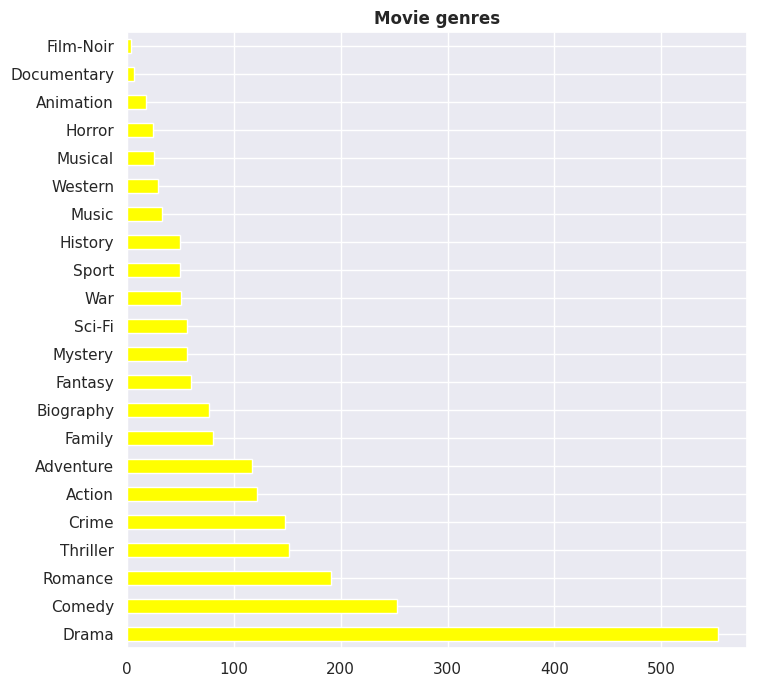

In [32]:
# Displaying the proportions of the movie genres present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()

In [33]:
df = df[df['Directors'].apply(lambda x: isinstance(x, str))]

# Splitting the directors by comma and removing leading spaces:
df['Directors'] = df['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
df = df.explode('Directors')

# Counting Matrix using crosstab method:
directors_counts = pd.crosstab(index = df.index, columns = df['Directors'], margins = False).to_dict('index')
directors_counts = pd.DataFrame(directors_counts)

# Counting the number of 0s and 1s in each row:
final_directors_counts = (directors_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

<ipython-input-33-58634f6b3413>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Directors'] = df['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])


In [34]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
final_directors_counts = pd.DataFrame(final_directors_counts.tolist(), index = final_directors_counts.index, columns = ['False', 'True'])
print(final_directors_counts)

                     False  True
Adrian Lyne            762     0
Alan Parker            763     0
Alan Shapiro           763     0
Albert Band            763     0
Albert Brooks          763     0
...                    ...   ...
Wolfgang Reitherman    761     0
Woody Allen            763     0
Yves Simoneau          763     0
Zoltan Korda           763     1
Ã‰lie Chouraqui        763     0

[591 rows x 2 columns]


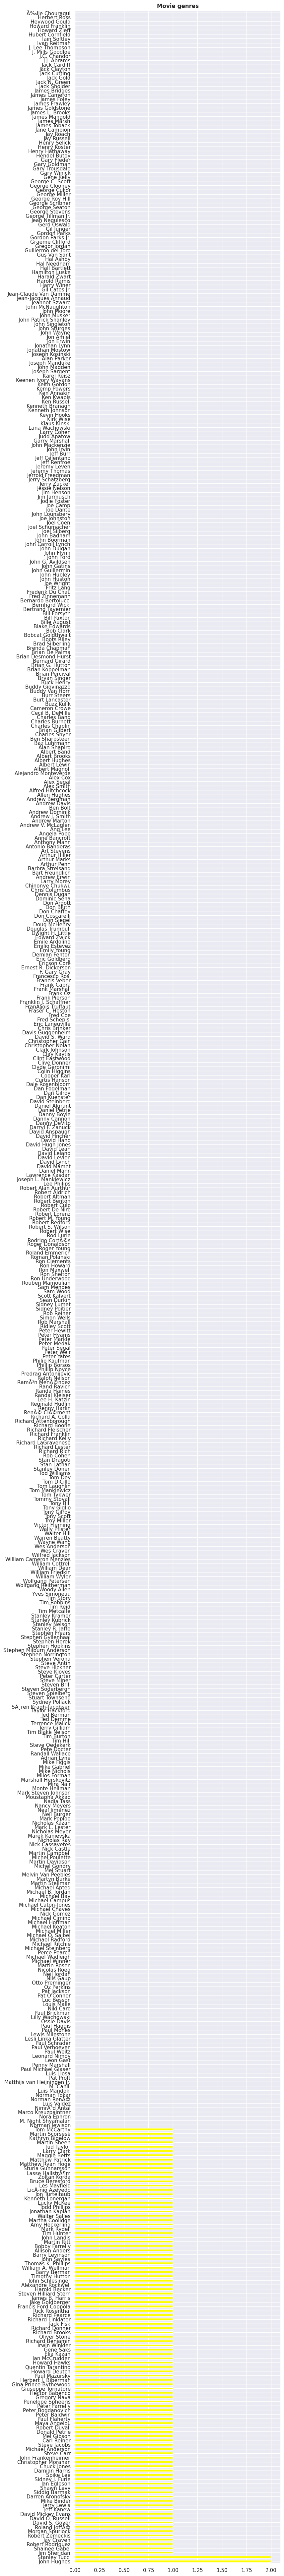

In [35]:
# Displaying the proportions of the directors present in the dataset:
final_directors_counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 100))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()

In [39]:
# Returning the movie rating mean by decade:
def decade_mean(row):
  row = df['Year Created']
  if row >= 1900 and  row <= 2000:
    mean = row.mean()
  elif row > 2000:
    mean = row.mean()
  else:
    mean = 'Unknown'
  return mean

# Applying the function above on a column of the dataset and generating a new column as result:
df['Mean by decade'] = df['Year Created'].apply(decade_mean)
df.head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().